<a href="https://colab.research.google.com/github/cbsobral/ml-fies/blob/main/Module01_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

### 1 - Load Dataset and exploring data

Here, we import the train set create in Module00_Data. 


In [ ]:
import pandas as pd

url_train = "https://drive.google.com/file/d/1vnDCyMQxbE7HfsQ3vU7jg0XQmmgsBU5G/view?usp=sharing"
path_train = "https://drive.google.com/uc?export=download&id="+url_train.split("/")[-2]
train = pd.read_csv(path_train)
train.shape

(496735, 31)

In [ ]:
url_test = "https://drive.google.com/file/d/1nXdt-4qTFZ823-xgbBJb7XgYRkSWLxAn/view?usp=sharing"
path_test = "https://drive.google.com/uc?export=download&id="+url_test.split("/")[-2]
test = pd.read_csv(path_test)
test.shape

In [ ]:
train_set = train.drop("default", axis=1) # drop targets for training set
train_target = train["default"].copy()

In [ ]:
test_set = test.drop("default", axis=1) # drop targets for test set
test_target = test["default"].copy()

In [ ]:
train_set['label'] = 'train'
test_set['label'] = 'test'

In [ ]:
complete_set = train_set.append(test_set)
complete_set.shape

(620919, 31)

In [ ]:
train_set

Here are some graphs of important variables in the training set:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

default_0 = "{:.0%}".format(sum(train["default"]==0)/len(train))
default_1 = "{:.0%}".format(sum(train["default"]==1)/len(train))

sns.catplot(x="default", kind="count", palette="Set2", data=train)
plt.annotate(default_0, xy=(0,214000))
plt.annotate(default_1, xy=(1,141000))
plt.title("Proportion of good (green) and bad borrowers in the training set")
plt.xlabel("Default Status")
plt.ylabel("Counts")

Above, we can see that we have an unbalanced training set. Around 60% of the instances are labeled as 0 (good borrowers) while around 40% are labeled as 1 (bad borrrowers.)

In [ ]:
plot_age = sns.displot(train, x="age", kind="kde", hue = "default",palette="Set2", fill = "true" )
plt.title("Density plot of age by default status")
plot_age.set(xlim=(10, 70))
plt.show()

We assumed we would have more distinct distributions of age for the two default status because some previous work found that age is a good predictor of default. Here, however, the distributions seem pretty similar.

In [ ]:
plot_income = sns.displot(train, x="income_pc", kind="kde", hue = "default",palette="Set2", fill = "true" )
plt.title("Density plot of income by default status")
plot_income.set(xlim=(0, 5000))

As we saw previously, income per capita is a good predictor of default status. Above we can see that for values higher than 1000, the probability of being a good borrower (green) is a lot higher than the default probability.

### 2 - Pipeline

The pipeline contains functions that will be used to transform the dataset. For the numeric attributes, we employ XXX.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ("num_imputer", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

ord_pipeline = Pipeline([
        ("ord_imputer", SimpleImputer(strategy="most_frequent")),
        ("ord_encoder", OrdinalEncoder()),
    ])

In [ ]:
ord_attribs = ['igc','date_contract'] # 2 attributes

num_attribs = ['family_income',   #17
               'personal_income',
               'high_school_endyear',
               'n_sem_course',
               'n_completed_sem',
               'sem_funded',
               'fam_size',
               'income_pc',
               'tuition_current',
               'inc_prop',
               'perc_requested',
               'loan_value_sem',
               'student_resource',
               'loan_value',
               'loan_limit',
               'total_debt',
               'age']
  

cat_attribs = ['semester_enroll',  #9
               'gender',
               'occupation', 
               'marital_status',
               'ethnicity', 
               'public_hs', 
               'state_course', 
               'degree', 
               'contract_phase']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("ord", ord_pipeline,ord_attribs)
        ])

In [ ]:
train_prepared = full_pipeline.fit_transform(train_set)
test_prepared = full_pipeline.fit_transform(test_set)

In [ ]:
complete_prepared = full_pipeline.fit_transform(complete_set)

In [ ]:
train_prepared[:1]

<1x568 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [ ]:
test_prepared[:1]

<1x505 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [ ]:
complete_prepared[:1]

<1x580 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

### 3 - Classifiers

For the initial runs, we employ 5 methods: Logistic regression, decision tree, random forest, SVC and ANN. The best result so far was achieved with the ANN -- AUC of XX. 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logr = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
logr.fit(train_prepared, train_target)
(cross_val_score(logr, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier()
dtc = dtc.fit(train_prepared, train_target)
(cross_val_score(dtc, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

0.6571229277170021

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_prepared, train_target)
(cross_val_score(rf, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, loss="hinge")
svm_clf.fit(train_prepared, train_target)
(cross_val_score(svm_clf, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

In [ ]:
# Polinomial SVC
from sklearn.svm import SVC

svm_clf_poli = SVC(kernel = "poly", degree = 3, coef0=1, C=5)
svm_clf_poli.fit(train_prepared, train_target)
(cross_val_score(svm_clf_poli, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(train_prepared, train_target.values.ravel())
(cross_val_score(mlp, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

### 4 - Visualization

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict probabilities
#pred_logr = logr.predict_proba(test_prepared)
pred_dtc = dtc.predict_proba(test_prepared)
#pred_rf = rf.predict_proba(test_prepared)

#pred_prob1 = model1.predict_proba(X_test)
#pred_prob2 = model2.predict_proba(X_test)

# AUC score
auc_logr = roc_auc_score(test_target, pred_logr[:,1])
auc_dtc = roc_auc_score(test_target, pred_dtc[:,1])
#auc_rf = roc_auc_score(test_target, pred_rf[:,1])

#print(auc_logr, auc_dtc, auc_rf)

ValueError: ignored

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr_logr, tpr_logr, thresh_logr = roc_curve(test_target, pred_logr[:,1], pos_label=1)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(test_target, pred_dtc[:,1], pos_label=1)
#fpr_rf, tpr_rf, thresh_rf = roc_curve(test_target, pred_rf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_target))]
p_fpr, p_tpr, _ = roc_curve(train_target, random_probs, pos_label=1)

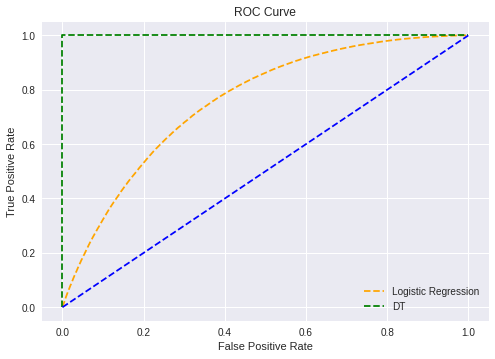

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_logr, tpr_logr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr_dtc, tpr_dtc, linestyle='--',color='green', label='DT')
#plt.plot(fpr_rf, tpr_rf, linestyle='--',color='pink', label='RF')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC Curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### SAMPLE CODE

In [ ]:
#from joblib import dump, load
#dump(dtc, 'logr.joblib') 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [ ]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


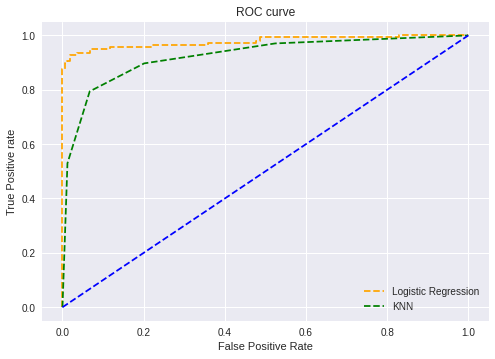

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();